<a href="https://colab.research.google.com/github/robitussin/CCMACLRL_EXERCISES/blob/main/Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


## Dataset File

In [3]:
# dataset_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/train.csv?raw=true'
df = pd.read_csv("train_titanic.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'train_titanic.csv'

In [483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Test File

In [484]:
# test_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/test.csv?raw=true'
dt=pd.read_csv("test_titanic.csv")
dt.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [485]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [486]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Drop Columns

In [487]:
df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Parch'], inplace=True)
df = pd.get_dummies(df, columns=['Sex', 'Pclass', 'Embarked', 'SibSp'])
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

# df.dropna(inplace=True)

dt.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Parch'], inplace=True)
dt = pd.get_dummies(dt, columns=['Sex', 'Pclass', 'Embarked', 'SibSp'])
dt['Age'].fillna(dt['Age'].mean(), inplace=True)
dt['Fare'].fillna(dt['Fare'].mean(), inplace=True)

# dt.dropna(inplace=True)

dt.isnull().sum()

C:\Users\carla\AppData\Local\Temp\ipykernel_21004\1507486393.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\carla\AppData\Local\Temp\ipykernel_21004\1507486393.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Age           0
Fare          0
Sex_female    0
Sex_male      0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
dtype: int64

## Charts

In [488]:
correlation = df.corr()
correlation

,Survived,Age,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
Survived,1.000000,-6.980852e-02,0.257307,0.543351,-0.543351,0.285904,0.093349,-0.322308,0.168240,0.003650,-0.155660,-0.115867,0.173076,0.029796,-0.037215,-0.064123,-0.059292,-7.023438e-02
Age,-0.069809,1.000000e+00,0.091566,-0.084153,0.084153,0.319916,0.006589,-0.281004,0.032024,-0.013855,-0.027121,0.148409,0.014570,-0.087613,-0.123176,-0.250211,-0.112724,2.240073e-18
Fare,0.257307,9.156609e-02,1.000000,0.182333,-0.182333,0.591711,-0.118557,-0.413333,0.269335,-0.117216,-0.166603,-0.192190,0.133121,0.070901,0.099936,-0.001008,0.022228,6.691284e-02
Sex_female,0.543351,-8.415344e-02,0.182333,1.000000,-1.000000,0.098013,0.064746,-0.137143,0.082853,0.074115,-0.125722,-0.203203,0.179339,0.042182,0.094850,-0.005735,-0.023967,1.418619e-02
Sex_male,-0.543351,8.415344e-02,-0.182333,-1.000000,1.000000,-0.098013,-0.064746,0.137143,-0.082853,-0.074115,0.125722,0.203203,-0.179339,-0.042182,-0.094850,0.005735,0.023967,-1.418619e-02
Pclass_1,0.285904,3.199164e-01,0.591711,0.098013,-0.098013,1.000000,-0.288585,-0.626738,0.296423,-0.155342,-0.170379,-0.058470,0.125673,-0.026838,-0.017331,-0.081228,-0.042496,-5.033822e-02
Pclass_2,0.093349,6.589145e-03,-0.118557,0.064746,-0.064746,-0.288585,1.000000,-0.565210,-0.125416,-0.127301,0.192061,-0.033099,0.077469,0.035244,-0.048107,-0.073253,-0.038324,-4.539647e-02
Pclass_3,-0.322308,-2.810040e-01,-0.413333,-0.137143,0.137143,-0.626738,-0.565210,1.000000,-0.153329,0.237449,-0.009511,0.077316,-0.171329,-0.005560,0.054084,0.129604,0.067804,8.031786e-02
Embarked_C,0.168240,3.202442e-02,0.269335,0.082853,-0.082853,0.296423,-0.125416,-0.153329,1.000000,-0.148258,-0.778359,-0.034759,0.092043,0.011850,-0.065184,-0.069217,-0.036212,-4.289517e-02
Embarked_Q,0.003650,-1.385524e-02,-0.117216,0.074115,-0.074115,-0.155342,-0.127301,0.237449,-0.148258,1.000000,-0.496624,0.055398,-0.066568,0.013285,-0.041590,0.069400,-0.023105,-2.736882e-02


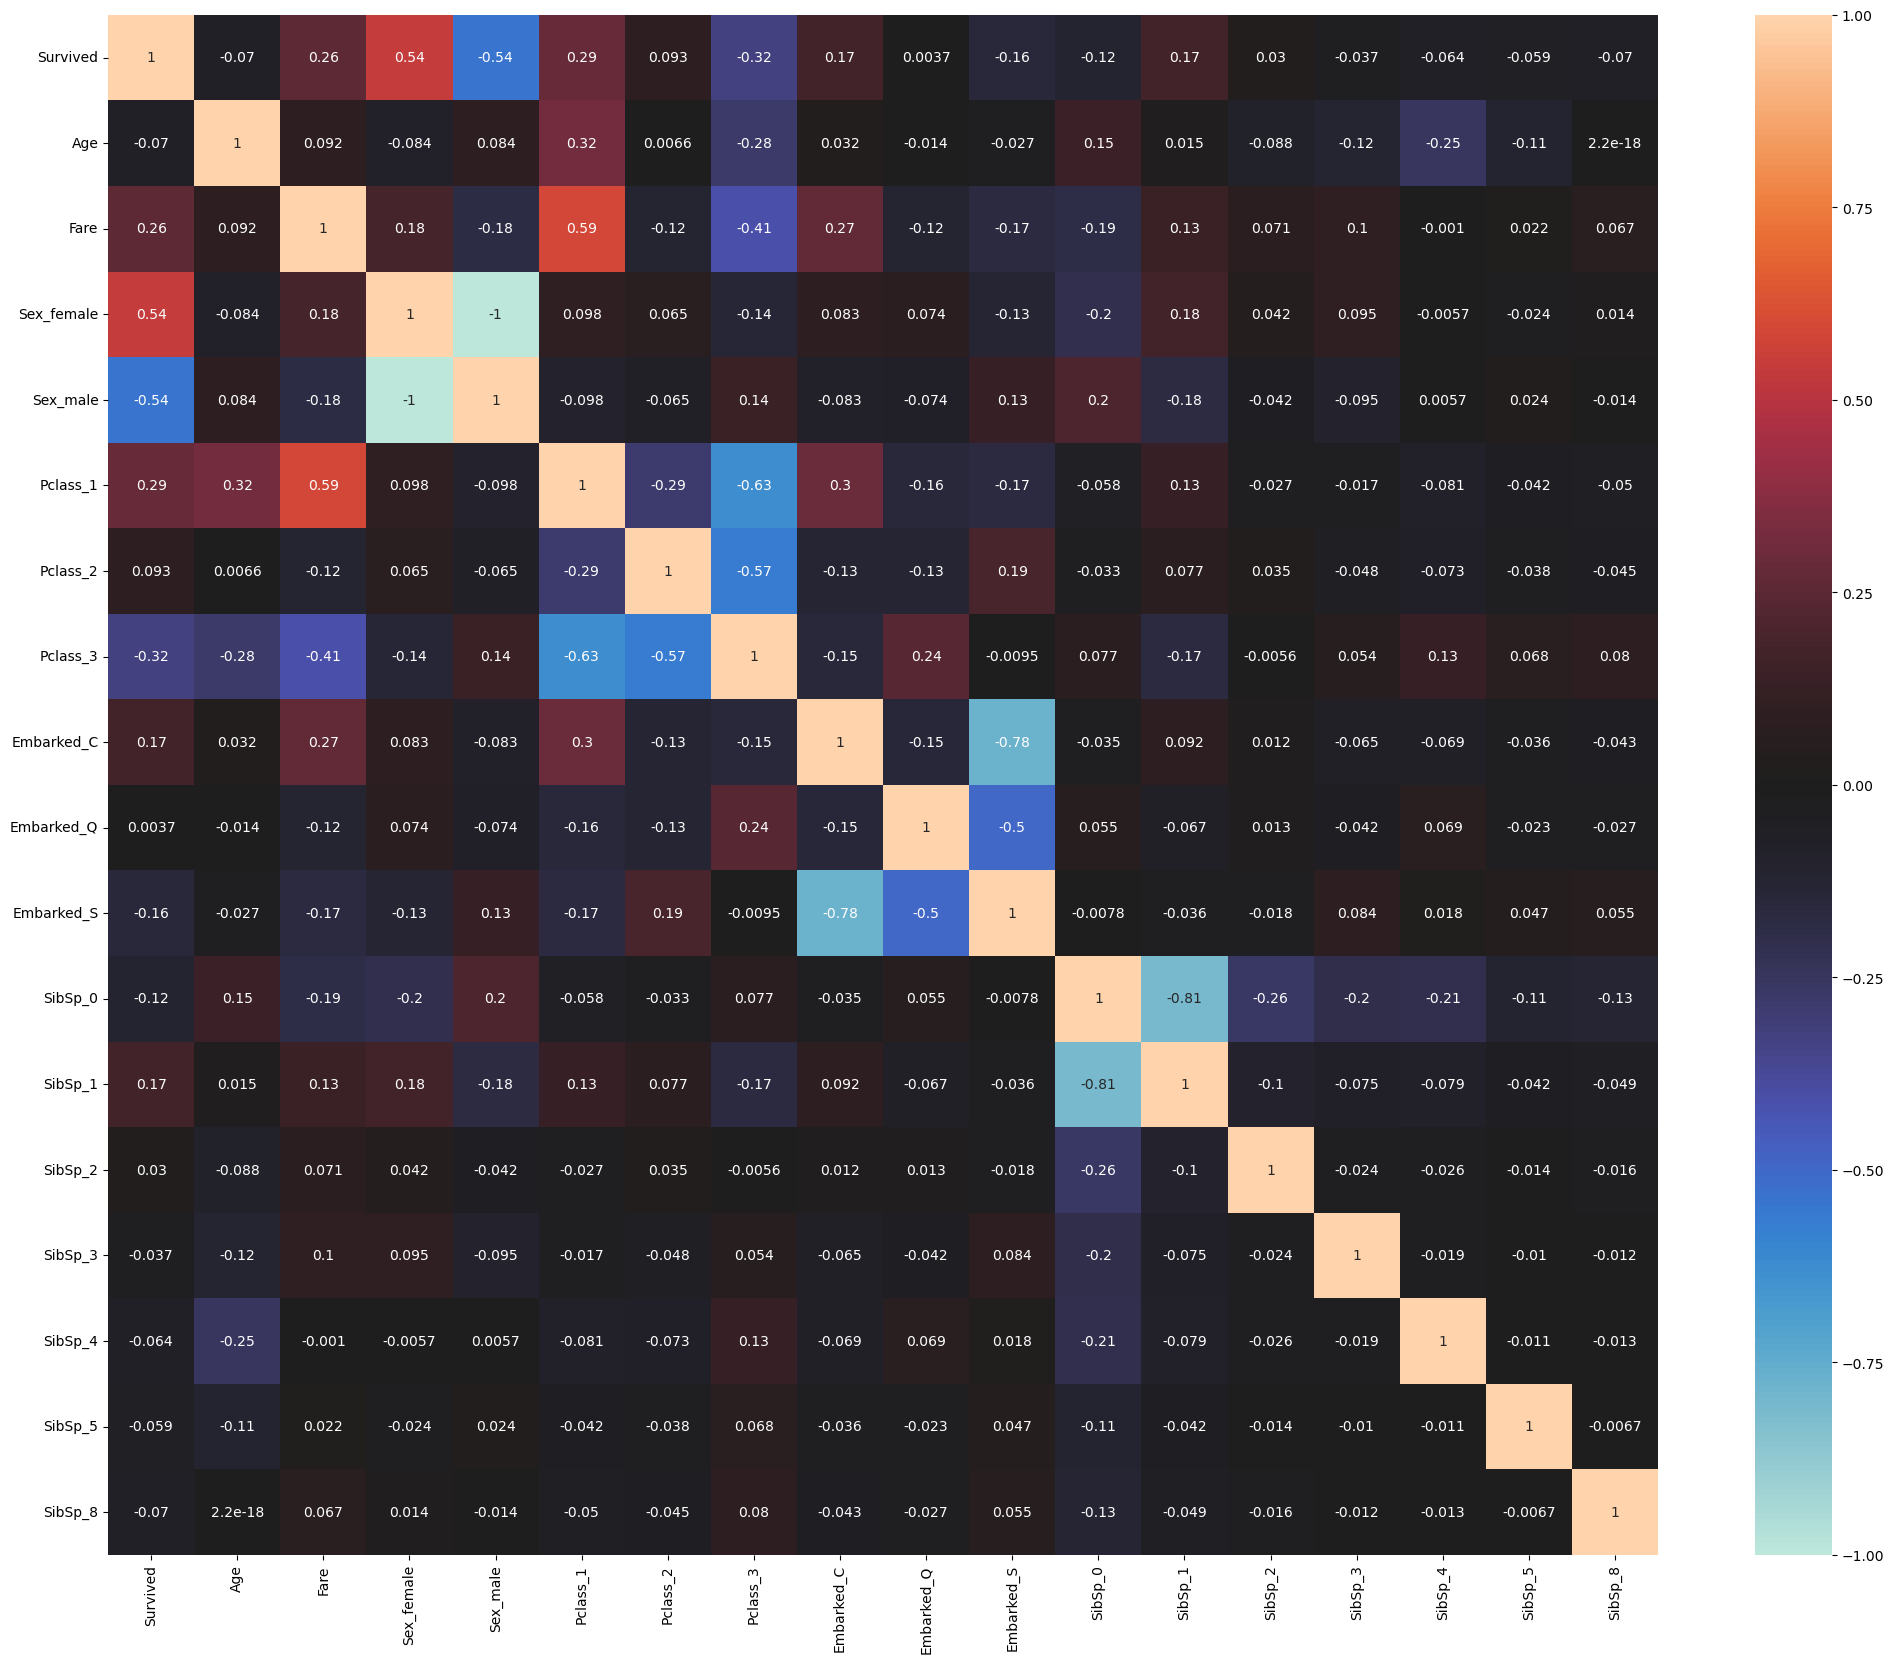

In [489]:
plt.figure(figsize=[25,20])
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

## Train Model

In [490]:
x = df.drop('Survived', axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [491]:
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

c:\Users\carla\miniconda3\envs\COM222ML\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [492]:
model.score(x_test, y_test)

0.7932960893854749

## Sample Submission File

In [493]:
# sample_submission_url ='https://github.com/robitussin/CCMACLRL_EXERCISES/blob/f5fdfba1aabbbafcf2fe49ca6e1c8f92f69d1458/datasets/titanic/gender_submission.csv?raw=true'

sf=pd.read_csv("gender_submission.csv")

In [494]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


## Generate Results

In [495]:
df.drop(columns = ['Survived'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         891 non-null    float64
 1   Fare        891 non-null    float64
 2   Sex_female  891 non-null    bool   
 3   Sex_male    891 non-null    bool   
 4   Pclass_1    891 non-null    bool   
 5   Pclass_2    891 non-null    bool   
 6   Pclass_3    891 non-null    bool   
 7   Embarked_C  891 non-null    bool   
 8   Embarked_Q  891 non-null    bool   
 9   Embarked_S  891 non-null    bool   
 10  SibSp_0     891 non-null    bool   
 11  SibSp_1     891 non-null    bool   
 12  SibSp_2     891 non-null    bool   
 13  SibSp_3     891 non-null    bool   
 14  SibSp_4     891 non-null    bool   
 15  SibSp_5     891 non-null    bool   
 16  SibSp_8     891 non-null    bool   
dtypes: bool(15), float64(2)
memory usage: 27.1 KB


In [496]:
id = sf.pop('PassengerId')
y_pred = model.predict(dt)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'PassengerID': id,
    'Survived': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
